In [1]:
#Install tensorflow
import tensorflow as tf
print(tf.__version__)

2.17.1


In [2]:
#Other imports
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

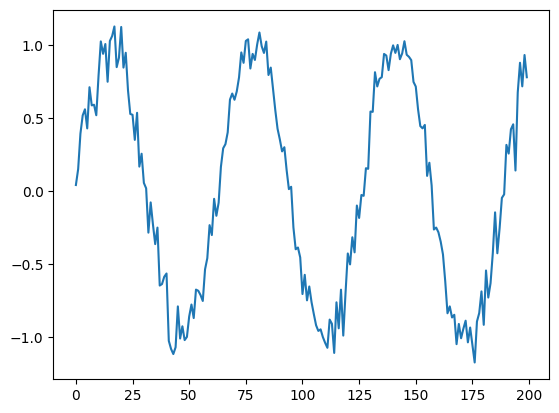

In [19]:
#Make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200) * 0.1 #Adding noise

plt.plot(series)
plt.show()

In [20]:
#Build the dataset
#let's see if we can use T past values to predict the next value
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [21]:
#Try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)

In [22]:
#Compile the model
model.compile(
     loss = 'mse',
    optimizer = Adam(learning_rate=0.1),
)

In [23]:
#Fit with data augmentation
r = model.fit(X[:-N//2], Y[:-N//2], validation_data=(X[-N//2:], Y[-N//2:]), epochs=80)

Epoch 1/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - loss: 4.2167 - val_loss: 0.5710
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5541 - val_loss: 1.0772
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.4091 - val_loss: 1.1583
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0354 - val_loss: 0.3294
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2369 - val_loss: 0.2243
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3152 - val_loss: 0.3858
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4443 - val_loss: 0.1946
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2156 - val_loss: 0.0636
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0712 - val_loss: 0.1740
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1621 - val_loss: 0.1421
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1017 - val_loss: 0.0310
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0363 - val_loss: 0.0592


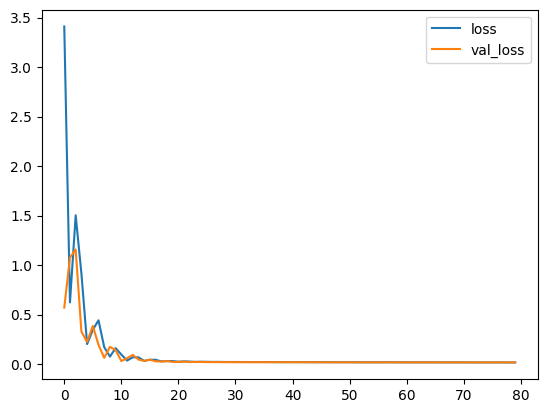

In [24]:
#Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

In [25]:
#Wrong forecast using true targets
validation_targets = Y[-N//2:]
validation_predictions = []

i = -N//2
while len(validation_predictions) < len(validation_targets):
  p = model.predict(X[i].reshape(1, -1))[0,0]
  i += 1
  validation_predictions.append(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

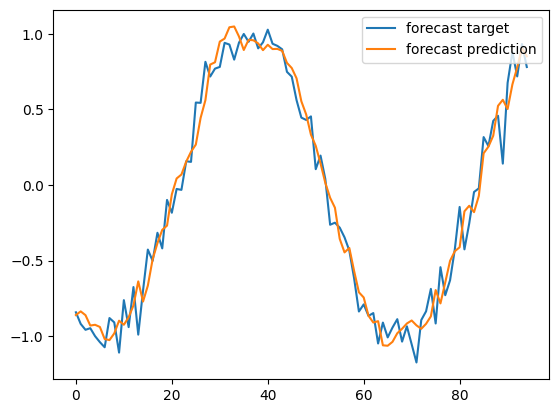

In [26]:
plt.plot(validation_targets, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()

In [27]:
# Forecast future values
validation_targets = Y[-N//2:]
validation_predictions = []

# Initialize the last input
last_x = X[-N//2].copy()  # Use a copy of the last input to avoid modifying the original data

# Iterate to generate predictions
while len(validation_predictions) < len(validation_targets):
    # Predict the next value
    p = model.predict(last_x.reshape(1, -1))[0, 0]

    # Append the prediction to the list
    validation_predictions.append(p)

    # Update the input for the next prediction
    last_x = np.roll(last_x, -1)  # Shift the input to the left
    last_x[-1] = p  # Replace the last value with the new prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

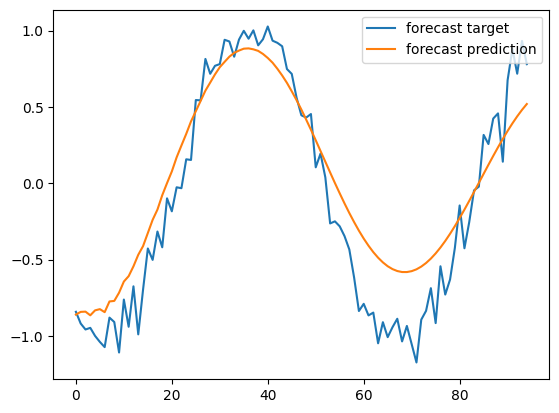

In [28]:
plt.plot(validation_targets, label = 'forecast target')
plt.plot(validation_predictions, label = 'forecast prediction')
plt.legend()